In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Setting up initial parameters
dx = .25 #delta x
c = .5 #wave speed
cfl = 1 #courant number
xt = 25 #total distance x
Nx = int(xt/dx + 1) #number of steps in x
dt = (cfl*dx)/c #delta t
tt = 10 #total time t
Nt = int(tt/dt + 1) #number of steps in t

In [3]:
#Setting up initial conditions
IC = []

#Making a list of x and t
x = [0]
for i in range(1,Nx):
    x.append(i*dx)
#print(x)
t = [0]
for i in range(1,Nt):
    t.append(i*dt)
#print(t)
#Creating initial conditions
for i in range(0,Nx):
    if 0<=x[i]<=3:
        IC.append(x[i])
    elif 3<=x[i]<=6:
        IC.append(6-x[i])
    else:
        IC.append(0)
#print(IC)

In [4]:
#Creating the exact solution
def exact(dx,c,cfl,Nx,dt,Nt,IC,x,t):
    u = np.array(IC) #initalize u with the initial conditions
    u = u[np.newaxis,:] #add the time axis to the previously 1D array
    for n in range (0,Nt): #loop in time
        u = np.vstack([u,np.zeros(Nx)]) #add the new row of 0's to be changed
        for i in range (0,Nx): #loop in space
            loc = dx*i - c*dt*n #find the location of the exact point by x - c*t (dx*i=x, dt*n=t)
            if 0<=loc<=3:
                u[n,i] = (loc)
            elif 3<=loc<=6:
                u[n,i] = (6-loc)
            else:
                u[n,i] = 0

    return u

def FTBS(dx,c,cfl,Nx,dt,Nt,IC,x,t):
    u = np.array(IC) #initalize u with the initial conditions
    u = u[np.newaxis,:] #add the time axis to the previously 1D array
    for n in range (0,Nt): #loop in time
        u = np.vstack([u,np.zeros(Nx)]) #add the new row of 0's to be changed
        for i in range (0,Nx): #loop in space
            u[n+1,i] = u[n,i] - cfl*(u[n,i]-u[n,i-1]) #FTBS
    return u

def FTCS(dx,c,cfl,Nx,dt,Nt,IC,x,t):
    u = np.array(IC) #initalize u with the initial conditions
    u = u[np.newaxis,:] #add the time axis to the previously 1D array
    for n in range (0,Nt): #loop in time
        u = np.vstack([u,np.zeros(Nx)]) #add the new row of 0's to be changed
        for i in range (0,Nx-1): #loop in space
            u[n+1,i] = u[n,i] - (cfl/2)*(u[n,i+1]-u[n,i-1]) #FTCS
    return u

def LAXF(dx,c,cfl,Nx,dt,Nt,IC,x,t):
    u = np.array(IC) #initalize u with the initial conditions
    u = u[np.newaxis,:] #add the time axis to the previously 1D array
    for n in range (0,Nt): #loop in time
        u = np.vstack([u,np.zeros(Nx)]) #add the new row of 0's to be changed
        for i in range (0,Nx-1): #loop in space
            u[n+1,i] = (.5)*(u[n,i+1] + u[n,i-1]) - (cfl/2)*(u[n,i+1]-u[n,i-1]) #Lax-Friedrichs
    return u

def LAXW(dx,c,cfl,Nx,dt,Nt,IC,x,t):
    u = np.array(IC) #initalize u with the initial conditions
    u = u[np.newaxis,:] #add the time axis to the previously 1D array
    for n in range (0,Nt): #loop in time
        u = np.vstack([u,np.zeros(Nx)]) #add the new row of 0's to be changed
        for i in range (0,Nx-1): #loop in space
            u[n+1,i] = u[n,i] - ((.5)*cfl*(u[n,i+1] - u[n,i-1])) + (.5)*(cfl**2)*(u[n,i+1] - (2*u[n,i]) + u[n,i-1]) #Lax-Wendroff
    return u    

def MACC(dx,c,cfl,Nx,dt,Nt,IC,x,t):
    u = np.array(IC) #initalize u with the initial conditions
    u = u[np.newaxis,:] #add the time axis to the previously 1D array
    for n in range (0,Nt): #loop in time
        u = np.vstack([u,np.zeros(Nx)]) #add the new row of 0's to be changed
        ubarnp1 = list()
        for i in range (0,Nx-1): #loop 1 in space
            ubarnp1.append(u[n,i] - cfl*(u[n,i+1]-u[n,i])) #creation of predictor for time n+1
        for i in range (0,Nx-1): #loop in space
            u[n+1,i] = (.5)*(u[n,i] + ubarnp1[i]) - (.5)*cfl*(ubarnp1[i] - ubarnp1[i-1]) #corrector for MacCormack
    return u 

uexact = exact(dx,c,cfl,Nx,dt,Nt,IC,x,t)
uftbs = FTBS(dx,c,cfl,Nx,dt,Nt,IC,x,t)
uftcs = FTCS(dx,c,cfl,Nx,dt,Nt,IC,x,t)
ulaxf = LAXF(dx,c,cfl,Nx,dt,Nt,IC,x,t)
ulaxw = LAXW(dx,c,cfl,Nx,dt,Nt,IC,x,t)
umacc = MACC(dx,c,cfl,Nx,dt,Nt,IC,x,t)

<function matplotlib.pyplot.show(close=None, block=None)>

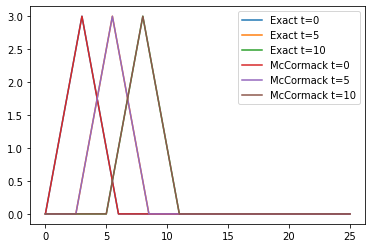

In [5]:
#Creating an excel file for ease of testing        
df = pd.DataFrame (uftbs)
filepath = 'FTBS CFL=.5.xlsx'
#df.to_excel(filepath, index=False)
df2 = pd.DataFrame (uexact)
filepath2 = 'exact CFL=.5.xlsx'
#df2.to_excel(filepath2, index=False)
df3 = pd.DataFrame (uftcs)
filepath3 = 'FTCS CFL=.5.xlsx'
#df3.to_excel(filepath3, index=False)
df4 = pd.DataFrame (ulaxf)
filepath4 = 'Lax-Friedrich CFL=.5.xlsx'
#df4.to_excel(filepath4, index=False)
#Creating the plots at t=0,2,5,10
plt.plot(x,uexact[t.index(0),:], label="Exact t=0")
#plt.plot(x,uexact[t.index(1.875),:], label="Exact t=1.875")
#plt.plot(x,uexact[t.index(2),:], label="Exact t=2")
plt.plot(x,uexact[t.index(5),:], label="Exact t=5")
plt.plot(x,uexact[t.index(10),:], label="Exact t=10")
#plt.plot(x,uexact[t.index(15),:], label="Exact t=15")
#plt.plot(x,uftbs[t.index(0),:], label="FTBS t=2")
#plt.plot(x,uftbs[t.index(1.875),:], label="FTBS t=1.875")
#plt.plot(x,uftbs[t.index(2),:], label="FTBS t=2")
#plt.plot(x,uftbs[t.index(5),:], label="FTBS t=5")
#plt.plot(x,uftbs[t.index(10),:], label="FTBS t=10")
#plt.plot(x,uftcs[t.index(0),:], label="FTCS t=0")
#plt.plot(x,uftcs[t.index(1.875),:], label="FTCS t=1.875")
#plt.plot(x,uftcs[t.index(2),:], label="FTCS t=2")
#plt.plot(x,uftcs[t.index(5),:], label="FTCS t=5")
#plt.plot(x,uftcs[t.index(10),:], label="FTCS t=10")
#plt.plot(x,ulaxf[t.index(0),:], label="Lax-Friedrichs t=0")
#plt.plot(x,ulaxf[t.index(1.875),:], label="Lax-Friedrichs t=1.875")
#plt.plot(x,ulaxf[t.index(2),:], label="Lax-Friedrichs t=2")
#plt.plot(x,ulaxf[t.index(5),:], label="Lax-Friedrichs t=5")
#plt.plot(x,ulaxf[t.index(10),:], label="Lax-Friedrichs t=10")
#plt.plot(x,ulaxf[t.index(15),:], label="Lax-Friedrichs t=15")
#plt.plot(x,ulaxw[t.index(0),:], label="Lax-Wendroff t=0")
#plt.plot(x,ulaxw[t.index(1.875),:], label="Lax-Wendroff t=1.875")
#plt.plot(x,ulaxw[t.index(2),:], label="Lax-Wendroff t=2")
#plt.plot(x,ulaxw[t.index(5),:], label="Lax-Wendroff t=5")
#plt.plot(x,ulaxw[t.index(10),:], label="Lax-Wendroff t=10")
#plt.plot(x,ulaxw[t.index(15),:], label="Lax-Wendroff t=15")
plt.plot(x,umcc[t.index(0),:], label="MacCormack t=0")
#plt.plot(x,umcc[t.index(1.875),:], label="MacCormack t=1.875")
#plt.plot(x,umcc[t.index(2),:], label="MacCormack t=2")
plt.plot(x,umcc[t.index(5),:], label="MacCormack t=5")
plt.plot(x,umcc[t.index(10),:], label="MacCormack t=10")
#plt.plot(x,umcc[t.index(15),:], label="MacCormack t=15")
plt.legend()
#plt.savefig("Lax plot CFL=.5 t to 15.png")
plt.show